In [60]:
import pandas as pd
import json
import re

In [61]:
dataset = pd.read_csv('../dataset/merged_stories_full.csv')
dataset.head(5)

,Unnamed: 0,Title,cleaned_story
0,0,Thumbelina,"Once upon a time, in a world of wonder and enc..."
1,1,The Star Money,"Once upon a time, in a quaint village nestled ..."
2,2,The Twelve Dancing Princesses,In a kingdom where castles touched the clouds ...
3,3,The Elves and the Shoemaker,In a quaint village nestled at the edge of a l...
4,4,The Fox and the Cat,"Once upon a time, in a lush forest filled with..."


In [62]:
dataset.shape

(1118, 3)

In [63]:
complete_text = dataset.iloc[1, 2]
complete_text

'Once upon a time, in a quaint village nestled between rolling hills and whispering trees, there lived a kind-hearted girl named Marie. Marie had a heart as pure as gold and a smile that could light up the darkest night. She lived in a small cottage with her elderly grandmother, who had taught her the value of kindness and generosity. One evening, as Marie was gazing at the starry sky through her window, she noticed a shooting star streaking across the heavens. Inspired by the magic of the moment, Marie made a wish – a wish to share her blessings with those in need. The next morning, as Marie ventured into the village, she encountered a poor beggar woman shivering in the cold. Without hesitation, Marie reached into her pocket and pulled out a shining silver coin, pressing it into the woman\'s hand with a warm smile. "Thank you, dear child," the beggar woman whispered, her eyes brimming with gratitude. Moved by the woman\'s words, Marie felt a warm glow spreading through her heart. Litt

In [64]:
len(dataset)

1118

## Count number of phrases and words by fairy tale

In [65]:
def count_phrases(text):
    phrases = re.findall(r'[^.!?]+[.!?]', text)
    return len(phrases)

def count_words(text):
    return len([word for word in text.split() if word.strip()])

In [66]:
count_phrases(complete_text)

23

In [67]:
# Add a new column with the number of frases
dataset['phrase_count'] = dataset.iloc[:, 2].apply(lambda x: count_phrases(x))

In [68]:
# Add a new column with the number of words
dataset['word_count'] = dataset.iloc[:, 2].apply(lambda x: count_words(x))

In [69]:
dataset.head(20)

,Unnamed: 0,Title,cleaned_story,phrase_count,word_count
0,0,Thumbelina,"Once upon a time, in a world of wonder and enc...",59,982
1,1,The Star Money,"Once upon a time, in a quaint village nestled ...",23,447
2,2,The Twelve Dancing Princesses,In a kingdom where castles touched the clouds ...,28,496
3,3,The Elves and the Shoemaker,In a quaint village nestled at the edge of a l...,52,711
4,4,The Fox and the Cat,"Once upon a time, in a lush forest filled with...",23,423
5,5,The Pink | Bedtime Stories,"Once upon a time, in a faraway kingdom nestled...",34,497
6,6,The Snow Queen,"Once upon a time, in a land covered in glisten...",32,497
7,7,Sleeping Beauty,"Once upon a time, in a land of magic and encha...",32,617
8,8,Hansel and Gretel,"Once upon a time, in a small village nestled a...",26,451
9,9,Madeline,"In the heart of Paris, where cobblestone stree...",38,638


In [70]:
# numero de frases
dataset['phrase_count'].sum()

128541

## Fairy tale with less than 5 phrases

In [71]:
# Count fairy tales where number of phrases is less than 5
len(dataset[dataset['phrase_count'] < 5])

4

In [72]:
# Select the title where phrase_count is less than 5
selected_titles = dataset.iloc[:, 1][dataset['phrase_count'] < 5]
selected_titles

37     Don't Let the Pigeon Drive the Bus!
99                   The Seven Foals Story
163       The Robber Bridegroom Fairy Tale
308                       The wilful child
Name: Title, dtype: object

In [73]:
# Select the 'title' column where phrase_count is equal to 10
selected_titles = dataset.iloc[:, 1][dataset['phrase_count'] == 10]
selected_titles

351    The Ditmarsch tale of wonders
392                   The golden key
397                       God's food
Name: Title, dtype: object

## Statistics of the number of phrases

In [74]:
# Statistics
phrase_count_stats = dataset['phrase_count'].describe()

print("Statistics of the number of phrases:")
print(phrase_count_stats)

Statistics of the number of phrases:
count    1118.000000
mean      114.974061
std       221.313185
min         2.000000
25%        38.000000
50%        77.000000
75%       142.750000
max      5349.000000
Name: phrase_count, dtype: float64


In [75]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [79]:
! pip install -U kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB 217.9 kB/s eta 0:05:03
   ---------------------------------------- 0.0/65.9 MB 330.3 kB/s eta 0:03:20
   ---------------------------------------- 0.1/65.9 MB 438.9 kB/s eta 0:02:31
   ---------------------------------------- 0.2/65.9 MB 833.5 kB/s eta 0:01:19
   ---------------------------------------- 0.3/65.9 MB 1.3 MB/s eta 0:00:52
   ---------------------------------------- 0.3/65.9 MB 1.2 MB/s eta 0:00:55
   ---------------------------------------- 0.4/65.9 MB 1.4 MB/s eta 0:00:47
   ---------------------------------------- 0.5/65.9 MB 1.5 MB/s eta 0:00:45
   ---------------------------------------- 0.7/65.9 MB 1.7 MB/s eta 0:00:38
   ---------------------------------------- 0.7/65.9 MB 1.6 MB/s eta 0:00:40
   ---------------------------------------- 0.8/65.9 MB 1.7 MB/s eta 0:00:39
    -

In [83]:
# Histogram: number of phrases
fig = px.histogram(dataset, x='phrase_count', nbins=max(dataset['phrase_count']), 
                   labels={'phrase_count': 'Number of Phrases by fairy tale', 'count': 'Number of Occurrences'},
                   title='Histogram of Number of Phrases',
                   log_y=True)  # Set log scale on y-axis

fig.update_layout(yaxis_title='Number of fairy tales')

#fig.show()
fig.write_image("./fig1.png")


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## Número de pareules

In [19]:
dataset['word_count'].sum()

2631859

## Fairy tale with less than 100 words

In [20]:
# Count fairy tales where number of words is less than 100x
len(dataset[dataset['word_count'] < 100])

4

In [21]:
# Select the title where word_count is less than 100
selected_titles = dataset.iloc[:, 1][dataset['word_count'] < 100]
selected_titles

37     Don't Let the Pigeon Drive the Bus!
99                   The Seven Foals Story
163       The Robber Bridegroom Fairy Tale
998          Lament of the Last Leprechaun
Name: Title, dtype: object

## Statistics of the number of words

In [22]:
# Statistics
word_count_stats = dataset['word_count'].describe()

print("Statistics of the number of words:")
print(word_count_stats)

Statistics of the number of words:
count      1118.000000
mean       2354.077818
std        4528.617368
min          51.000000
25%         682.000000
50%        1591.000000
75%        2945.750000
max      124865.000000
Name: word_count, dtype: float64


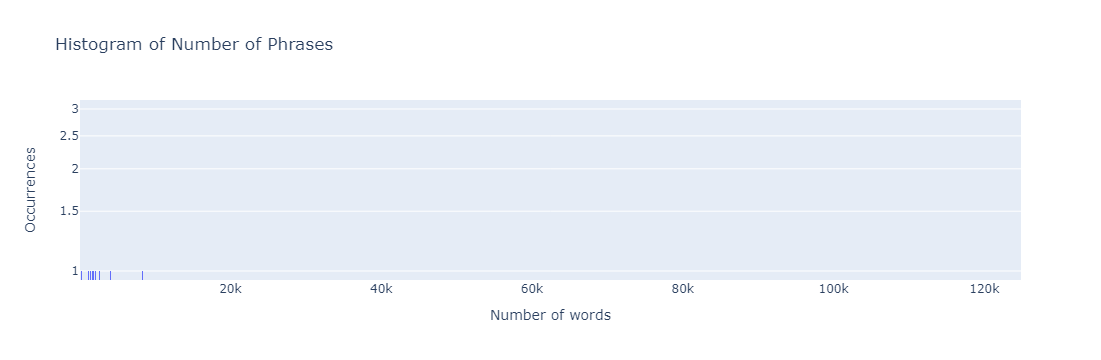

In [23]:
# Histogram: number of words
fig = px.histogram(dataset, x='word_count', nbins=max(dataset['word_count']), 
                   labels={'word_count': 'Number of words', 'count': 'Number of Occurrences'},
                   title='Histogram of Number of Phrases',
                   log_y=True)  # Set log scale on y-axis

fig.update_layout(yaxis_title='Occurrences')

fig.show()

## Statistics of phrases tokenizeds

## Histo de tokenizers per fraser

In [24]:
import os
from torch.utils.data import Dataset
import torch
#from wordPieceTokenizer import WordPieceTokenizer
import json
import re
import urllib.request
from collections import defaultdict, Counter
import random
import numpy as np

random.seed(0)
import pandas as pd
def load_separate_and_clean_stories(filename):
    with open(filename, 'r') as file:
        content = file.read()

    stories = content.split('\n\n\n\n')

    cleaned_stories = []
    for story in stories:
        cleaned_story = re.sub(r'\n\s*\n', '\n', story.strip())
        cleaned_stories.append(cleaned_story)
    
    return cleaned_stories

def separate_sentences(text):
    text = text.replace('...','#^')
    text = text.replace('.','~.')
    text = text.replace('?','@?')
    text = text.replace('!','%!')
    
    b = re.split('[.?!^]' , text)                                                                                                                                                                                                                                                                                                                                          
    c = [w.replace('~', '.') for w in b]
    c = [w.replace('@', '?') for w in c]
    c = [w.replace('#', '...') for w in c]
    c = [w.replace('%', '!') for w in c]
    
    return(c)

In [25]:
class WordPieceTokenizer():
    def __init__(self, vocab_size=10000):
        self.vocab = {}
        self.word_freqs = {}
        self.vocab_size = vocab_size
        self.unk_token = "[UNK]"
        self.aps_token = "[APS]"
        self.space_token = "[SPACE]"
        self.brk_token = "[BRK]"
        self.sep_token = "[SEP]"
        self.cls_token = "[CLS]"
        self.pad_token = "[PAD]"
        self.mask_token = "[MASK]"
        self.wordpieces_prefix ="##"
        self.word2idx = {}
        self.idx2word = {}

   
    def fit(self, text):
        # Count word frequencies
        text = re.sub(r'\n+', ' ' + self.brk_token + ' ', text)
        text = re.sub(r"\s'\s", self.space_token + self.aps_token + self.space_token, text)
        text = re.sub(r"\s'", self.space_token + self.aps_token, text)
        text = re.sub(r"'\s",  self.aps_token + self.space_token, text)
        # Change charcater ' to [APS]
        text = re.sub(r'\'', self.aps_token, text)
        words = re.findall(r'\w+[\w.,;!?\'\"-]*|[\.,;!?\'\"-]+', text)
        
        self.word_freqs = Counter(words)

        alphabet = []
        for word in self.word_freqs.keys():
            if word == self.brk_token or word == self.aps_token or word == self.space_token:
                continue 
            # Add the first letter of the word to the alphabet if not exists
            if word[0] not in alphabet:
                alphabet.append(word[0])
            # Add the rest of the letters to the alphabet if not exist with a prefix
            for letter in word[1:]:
                if f"##{letter}" not in alphabet:
                    alphabet.append(f"##{letter}")

        alphabet.sort()
        
        # Add special tokens to the vocabulary plus the created alphabet
        self.vocab = [self.unk_token, self.cls_token, self.sep_token, self.space_token, self.pad_token, self.mask_token, self.brk_token, self.aps_token ] + alphabet.copy()
        # Create a dictionary with all words and all splitted characters
        splits = {
            word: [c if i == 0 else f"##{c}" for i, c in enumerate(word)]
            for word in self.word_freqs.keys()
        }
        
        while len(self.vocab) < self.vocab_size:
            scores = self._compute_pair_scores(splits)
            if not scores:
                break
            best_pair, max_score = "", None
            for pair, score in scores.items():
                if max_score is None or max_score < score:
                    best_pair = pair
                    max_score = score
            
            splits = self._merge_pair(*best_pair, splits)
            new_token = (
                best_pair[0] + best_pair[1][2:]
                if best_pair[1].startswith("##")
                else best_pair[0] + best_pair[1]
            )
            self.vocab.append(new_token)
        self.word2idx = {word: idx for idx, word in enumerate(self.vocab)}
        self.idx2word = {idx: word for idx, word in enumerate(self.vocab)}
        print(self.vocab)
        print(len(self.vocab))
        print(self.word_freqs)
    
    
    def encode(self, text):
        # Normalize and split the text
        text = re.sub(r'\n+', ' ' + self.brk_token + ' ', text)
        text = re.sub(r"\s'\s", self.space_token + self.aps_token + self.space_token, text)
        text = re.sub(r"\s'", self.space_token + self.aps_token, text)
        text = re.sub(r"'\s",  self.aps_token + self.space_token, text)
        # Change charcater ' to [APS] and
        text = re.sub(r'\'', self.aps_token, text)
        pattern = r'\w+[\w.,;!?\'\"-]*|[\.,;!?\'\"-]+|(?:' + re.escape(self.brk_token) + r'|' + re.escape(self.aps_token) + r'|' + re.escape(self.space_token) + r')'
        words = re.findall(pattern, text)
        
        # Tokenize into words and subwords
        tokens = []
        for word in words:
            if word in self.vocab:
                tokens.append(word)
            else:
                sub_tokens = self.tokenize_word(word)
                tokens.extend(sub_tokens)
    
        
        # Convert tokens to ids
        token_ids = []
        token_ids.extend(self.word2idx[token] for token in tokens if token in self.word2idx)

        return token_ids

    def tokenize_word(self, word):
        if word == self.brk_token:
            return [self.brk_token]
        if word == self.aps_token:
            return [self.aps_token]
        if word == self.space_token:
            return [self.space_token]
        
        subwords = []
        start = 0
        while start < len(word):
            match = False
            for end in range(len(word), start, -1):
                subword = word[start:end]
                if start > 0:
                    subword = "##" + subword
                if subword in self.vocab:
                    subwords.append(subword)
                    start = end
                    match = True
                    break
            if not match:  # No subword match found
                subwords.append(self.unk_token)
                break
        return subwords
    
    def add_special_tokens(self, token_ids1, token_ids2, max_length=60):
        tokens_with_special_tokens  = [self.word2idx[self.cls_token]] + token_ids1 + [self.word2idx[self.sep_token]] + token_ids2 + [self.word2idx[self.sep_token]]
        # Create attention mask
        attention_mask = [1] * len(tokens_with_special_tokens)

        # Create token segment type ids
        token_type_ids = [0] * (len(token_ids1) + 2) + [1] * (len(token_ids2) + 1)
        

        padded_token_ids = tokens_with_special_tokens + [self.word2idx[self.pad_token]] * (max_length - len(tokens_with_special_tokens))
        attention_mask = attention_mask + [0] * (max_length - len(attention_mask))
        token_type_ids = token_type_ids + [0] * (max_length - len(token_type_ids))
        
        return padded_token_ids, attention_mask, token_type_ids
    
    def decode(self, indices):
        tokens = [self.idx2word[index] for index in indices]
        # Split the text by the first sep_token
        sep_index = tokens.index(self.sep_token)
        sentence1 = tokens[1:sep_index]
        sentence2 = tokens[sep_index + 1:]
        text1 = ''
        text2 = ''
        # Perform for loop for both sentences at the same time
        

        for token in sentence1:
            if token.startswith(self.wordpieces_prefix):
                # Remove the '##' prefix and concatenate without space
                text1 += token[2:]
            elif token in [self.unk_token, self.cls_token, self.sep_token, self.pad_token, self.mask_token]:
                # Skip special tokens if desired, or handle them differently
                continue
            elif token == self.aps_token:
                # Replace [APS] with a ' character
                text1 += "'"
            elif token == self.space_token:
                # Replace [SPACE] with a space character
                text1 += ' '
            elif token == self.brk_token:
                # Replace [BRK] with a newline character
                text1 += '\n'
            else:
                # Add a space before the token if it's not the first token and the last character isn't a newline
                if text1 and not text1.endswith('\n') and not text1.endswith("'"):
                    text1 += ' '
                text1 += token

        for token in sentence1:
            if token.startswith(self.wordpieces_prefix):
                # Remove the '##' prefix and concatenate without space
                text2 += token[2:]
            elif token in [self.unk_token, self.cls_token, self.sep_token, self.pad_token, self.mask_token]:
                # Skip special tokens if desired, or handle them differently
                continue
            elif token == self.aps_token:
                # Replace [APS] with a ' character
                text2 += "'"
            elif token == self.space_token:
                # Replace [SPACE] with a space character
                text2 += ' '
            elif token == self.brk_token:
                # Replace [BRK] with a newline character
                text2 += '\n'
            else:
                # Add a space before the token if it's not the first token and the last character isn't a newline
                if text2 and not text2.endswith('\n') and not text2.endswith("'"):
                    text2 += ' '
                text2 += token

        return text1, text2
    
    def save(self, path):
       with open(path, 'w') as f:
            json.dump({
                'vocab': self.vocab,
                'word_freqs': self.word_freqs,
                'word2idx': self.word2idx,
                'idx2word': self.idx2word,
            }, f, ensure_ascii=False)

    def load(self, path):
        with open(path, 'r') as f:
            data = json.load(f)
            self.vocab =  data['vocab']
            self.vocab_size = len(self.vocab)
            self.word_freqs =  {k: int(v) for k, v in data['word_freqs'].items()}
            self.word2idx =  {k: int(v) for k, v in data['word2idx'].items()}
            self.idx2word = {int(k): v for k, v in data['idx2word'].items()}
            
        
    def _compute_pair_scores(self, splits):
        letter_freqs = defaultdict(int)
        pair_freqs = defaultdict(int)
        # Compute the frequency of each letter and pair of consecutive letters
        for word, freq in self.word_freqs.items():
            split = splits[word]
            if len(split) == 1:
                letter_freqs[split[0]] += freq
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                letter_freqs[split[i]] += freq
                pair_freqs[pair] += freq
            letter_freqs[split[-1]] += freq

        # Compute the score of each pair (pair frequency / (letter1 frequency * letter2 frequency)
        scores = {
            pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
            for pair, freq in pair_freqs.items()
        }
        return scores
    
    def _merge_pair(self, a, b, splits):
        for word in self.word_freqs:
            split = splits[word]
            if len(split) == 1:
                continue
            i = 0
            while i < len(split) - 1:
                if split[i] == a and split[i + 1] == b:
                    merge = a + b[2:] if b.startswith("##") else a + b
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            splits[word] = split
        return splits

def mask_tokens(token_ids, tokenizer):
    # Mask 15% of the tokens
    masked_indices = set()
    # 15% of significant tokens, different to [CLS], [SEP], and [PAD]
    significant_tokens = [token for token in token_ids if token not in [tokenizer.word2idx[tokenizer.cls_token], tokenizer.word2idx[tokenizer.sep_token], tokenizer.word2idx[tokenizer.pad_token]]]
    num_masked = max(1, int(len(significant_tokens) * 0.15))
    while len(masked_indices) < num_masked:
        index = random.randint(1, len(token_ids) - 2)
        if index in masked_indices:
            continue
        token = token_ids[index]
        if token in [tokenizer.word2idx[tokenizer.cls_token], tokenizer.word2idx[tokenizer.sep_token], tokenizer.word2idx[tokenizer.pad_token]]:
            continue
        token_ids[index] = tokenizer.word2idx[tokenizer.mask_token]
        masked_indices.add(index)
    
    labels = [-100 if i not in masked_indices else token_ids[i] for i in range(len(token_ids))]
    return token_ids, labels


def load_separate_and_clean_stories(filename):
    with open(filename, 'r') as file:
        content = file.read()

    stories = content.split('\n\n\n\n')

    cleaned_stories = []
    for story in stories:
        cleaned_story = re.sub(r'\n\s*\n', '\n', story.strip())
        cleaned_stories.append(cleaned_story)
    
    return cleaned_stories

In [26]:
dataset = pd.read_csv('../dataset/merged_stories_full.csv')
dataset.head(5)
tokenizer = WordPieceTokenizer()
tokenizer.load('../tokenizer/wordPieceVocab.json')

In [85]:
dataset.head()

,Unnamed: 0,Title,cleaned_story,phrase_count,word_count
0,0,Thumbelina,"Once upon a time, in a world of wonder and enc...",59,982
1,1,The Star Money,"Once upon a time, in a quaint village nestled ...",23,447
2,2,The Twelve Dancing Princesses,In a kingdom where castles touched the clouds ...,28,496
3,3,The Elves and the Shoemaker,In a quaint village nestled at the edge of a l...,52,711
4,4,The Fox and the Cat,"Once upon a time, in a lush forest filled with...",23,423


## Fer un dataset amb una frase per cada fila

In [29]:
dataset_phrases = dataset.copy()

In [30]:
# Select value of column 'cleaned_story' in row 1 using .loc[]
value_of_text_in_row_1 = dataset_phrases.loc[1, 'cleaned_story']
value_of_text_in_row_1

'Once upon a time, in a quaint village nestled between rolling hills and whispering trees, there lived a kind-hearted girl named Marie. Marie had a heart as pure as gold and a smile that could light up the darkest night. She lived in a small cottage with her elderly grandmother, who had taught her the value of kindness and generosity. One evening, as Marie was gazing at the starry sky through her window, she noticed a shooting star streaking across the heavens. Inspired by the magic of the moment, Marie made a wish – a wish to share her blessings with those in need. The next morning, as Marie ventured into the village, she encountered a poor beggar woman shivering in the cold. Without hesitation, Marie reached into her pocket and pulled out a shining silver coin, pressing it into the woman\'s hand with a warm smile. "Thank you, dear child," the beggar woman whispered, her eyes brimming with gratitude. Moved by the woman\'s words, Marie felt a warm glow spreading through her heart. Litt

In [31]:
# Split the text into phrases using regular expressions
phrases = re.findall(r'[^.!?]+[.!?]', value_of_text_in_row_1)
print(phrases)

['Once upon a time, in a quaint village nestled between rolling hills and whispering trees, there lived a kind-hearted girl named Marie.', ' Marie had a heart as pure as gold and a smile that could light up the darkest night.', ' She lived in a small cottage with her elderly grandmother, who had taught her the value of kindness and generosity.', ' One evening, as Marie was gazing at the starry sky through her window, she noticed a shooting star streaking across the heavens.', ' Inspired by the magic of the moment, Marie made a wish – a wish to share her blessings with those in need.', ' The next morning, as Marie ventured into the village, she encountered a poor beggar woman shivering in the cold.', " Without hesitation, Marie reached into her pocket and pulled out a shining silver coin, pressing it into the woman's hand with a warm smile.", ' "Thank you, dear child," the beggar woman whispered, her eyes brimming with gratitude.', " Moved by the woman's words, Marie felt a warm glow sp

## Phrases and tokens by phrase

In [32]:
dataset_curt =  dataset.head(5).copy()
dataset_cp =  dataset.copy()

In [33]:
# Create columns of new df
data = {
    'Title': ['test'],
    #'cleaned_story':['test'],
    'phrase':['test'],
    'tokenizer_length': [75]
}

# Create a DataFrame
tokenized_df = pd.DataFrame(data)
tokenized_df=tokenized_df.drop(0)
tokenized_df.head()

,Title,phrase,tokenizer_length


In [34]:
for index, row in dataset_cp.iterrows():
    #phrases = re.findall(r'[^.!?]+[.!?]', dataset_cp.loc[index, 'cleaned_story'])
    history_text = row['cleaned_story']
    phrases = re.findall(r'[^.!?]+[.!?]', history_text)

    title = row['Title']
    for x in phrases:
        enc = tokenizer.encode(x)
        tokenizer_length = len(enc)
        new_row = {'Title': title, 'phrase': x, 'tokenizer_length':tokenizer_length}
        #tokenized_df = tokenized_df.append(new_row, ignore_index=True)
        ###########33
        tokenized_df.loc[len(tokenized_df.index)] = [title, x, tokenizer_length] 

        


,Title,phrase,tokenizer_length
0,Thumbelina,"Once upon a time, in a world of wonder and enc...",43
1,Thumbelina,"She was no bigger than a thumb, with eyes as ...",44
2,Thumbelina,"Thumbelina's story is filled with magic, adve...",52
3,Thumbelina,"One day, a kindly old woman, who loved to pla...",43
4,Thumbelina,"The gift was a shimmering, mystical seed.",17
...,...,...,...
128536,The Lad With The Goat-Skin,"But a messenger came in at noon, and said tha...",59
128537,The Lad With The Goat-Skin,"Well, I suppose, before they were married, To...",132
128538,The Lad With The Goat-Skin,Whether he ever lost his time learning them s...,56
128539,The Lad With The Goat-Skin,MAN OR WOMAN BOY OR GIRL THAT READS WHAT FOLL...,40


In [36]:
tokenized_df['tokenizer_length'].sum()

5130412

In [37]:
tokenized_df.to_csv('../dataset/tokens_per_phrase.csv')

# read tokenized csv

In [53]:
tokenized_df = pd.read_csv('../dataset/tokens_per_phrase.csv')
tokenized_df.head(5)

,Unnamed: 0,Title,phrase,tokenizer_length
0,0,Thumbelina,"Once upon a time, in a world of wonder and enc...",43
1,1,Thumbelina,"She was no bigger than a thumb, with eyes as ...",44
2,2,Thumbelina,"Thumbelina's story is filled with magic, adve...",52
3,3,Thumbelina,"One day, a kindly old woman, who loved to pla...",43
4,4,Thumbelina,"The gift was a shimmering, mystical seed.",17


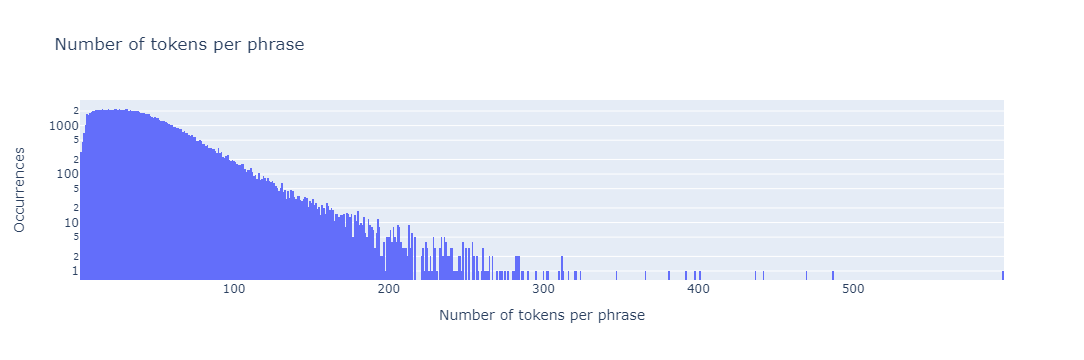

In [91]:
# Histogram: number of tokens per phrase
fig = px.histogram(tokenized_df, x='tokenizer_length', nbins=max(tokenized_df['tokenizer_length']), 
                   labels={'word_count': 'Number of tokens per phrase', 'count': 'Number of Occurrences'},
                   title='Number of tokens per phrase',
                   log_y=True)  # Set log scale on y-axis

fig.update_layout(yaxis_title='Occurrences')
fig.update_layout(xaxis_title='Number of tokens per phrase')
fig.show()

In [41]:
tokenized_df.head()

,Title,phrase,tokenizer_length
0,Thumbelina,"Once upon a time, in a world of wonder and enc...",43
1,Thumbelina,"She was no bigger than a thumb, with eyes as ...",44
2,Thumbelina,"Thumbelina's story is filled with magic, adve...",52
3,Thumbelina,"One day, a kindly old woman, who loved to pla...",43
4,Thumbelina,"The gift was a shimmering, mystical seed.",17


In [46]:
tokenized_df['tokenizer_length'].lt(1).count()

128541

## Select rows with token length less than 2

In [84]:
len(tokenized_df[tokenized_df['tokenizer_length'] < 1])

0

In [50]:
# Count phrases where number of tokens is less than 2
len(tokenized_df[tokenized_df['tokenizer_length'] < 2])

289

In [52]:
# Select the title where phrase_count is less than 5
selected_ph = tokenized_df.iloc[:, 0:2][tokenized_df['tokenizer_length'] < 2]
selected_ph

,Title,phrase
2654,Little Star’s Adventure,Enjoy!
3748,The Snow Maiden (Snegurochka) Story,Father?
5109,The Old Woman and Her Pig,Fire!
5129,The Old Woman and Her Pig,Rope!
5134,The Old Woman and Her Pig,Rat!
...,...,...
125265,Masonwork,Curdie!
125266,Masonwork,Curdie!
126635,King O'Toole And His Goose,Kavin.
126658,King O'Toole And His Goose,Kavin.


## Select rows with token lengths larger than 400

In [54]:
# Count phrases where number of tokens is more than 400
len(tokenized_df[tokenized_df['tokenizer_length'] > 400])

6

In [57]:
# Select the title where phrase_count is  more than 400
selected_ph_400 = tokenized_df.iloc[:, 1:3][tokenized_df['tokenizer_length'] > 400]
selected_ph_400

,Title,phrase
29510,The Story Of The Envier And The Envied.,"Rejoicing greatly in my escape, I immediately..."
29994,"THE STORY OF THE THREE APPLES, &c.","When, therefore, he awoke, and found that he ..."
30986,The Barber'S Story Of Himself,--And when I heard the address of the Prince o...
31610,The Story Of Noor-Ed-Deen And Enees-El-Jelees.,"The fruits upon the trees, comprising every d..."
111237,The Tale of the Envier and the Envied.,"Then I fared forth, O my lady, and every day ..."
111573,The Eldest Lady's Tale.,And of a truth Allah the Most High had robed ...


In [58]:
# Count phrases where number of tokens is more than 256
len(tokenized_df[tokenized_df['tokenizer_length'] > 256])

53

## check tokens by phrase

In [86]:
text = ' It was during one of these attacks of sadness that a jelly-fish happened to swim by. At that time jelly-fishes had shells.'

In [92]:
enc=tokenizer.encode(text)

In [93]:
len(enc)

45